# ---- Job Data Analysis 2024 using python----

In [6]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
plt.style.use('ggplot')
from matplotlib.ticker import FuncFormatter
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head(4)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."


In [7]:
# EDA
df.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,785741,22003.000000,10662.000000
mean,2023-06-25 16:02:11.860248576,123286.274072,47.016598
min,2023-01-01 00:00:04,15000.000000,8.000000
25%,2023-03-20 10:05:48,90000.000000,27.500000
50%,2023-06-29 06:11:38,115000.000000,45.980000
75%,2023-09-27 01:01:16,150000.000000,61.159996
max,2023-12-31 23:59:58,960000.000000,391.000000
std,NaN,48312.449482,21.890738


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

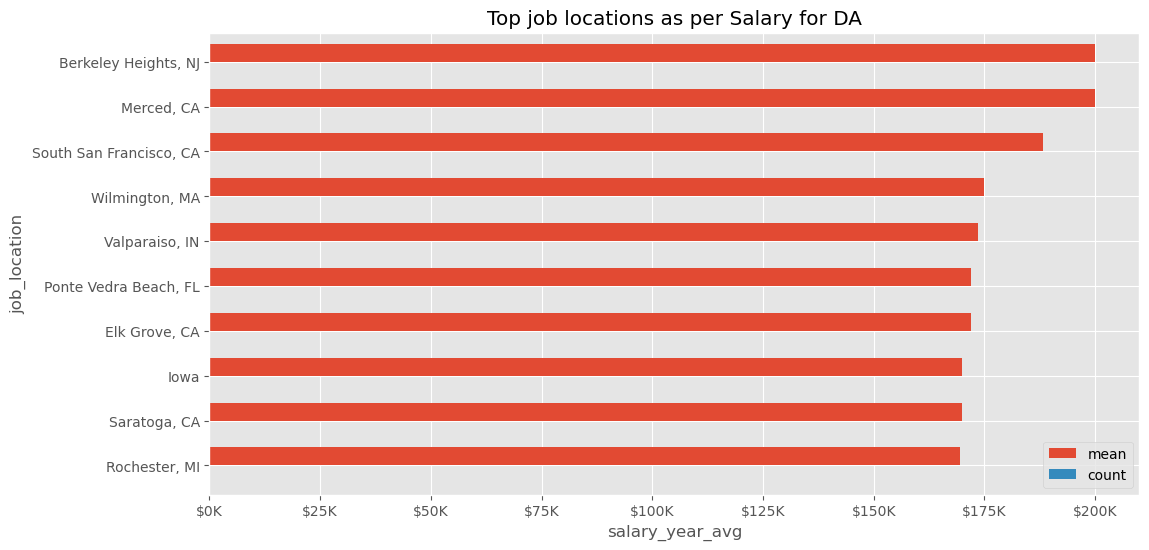

In [9]:
df_plot = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']=='United States')].groupby('job_location')['salary_year_avg'].agg(['mean', 'count']).sort_values('mean', ascending=False).head(10)

df_plot.plot(kind='barh', title='Top job locations as per Salary for DA', figsize=(12,6), width=0.8)
plt.xlabel('salary_year_avg')
ax = plt.gca()
ax.invert_yaxis()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.show()

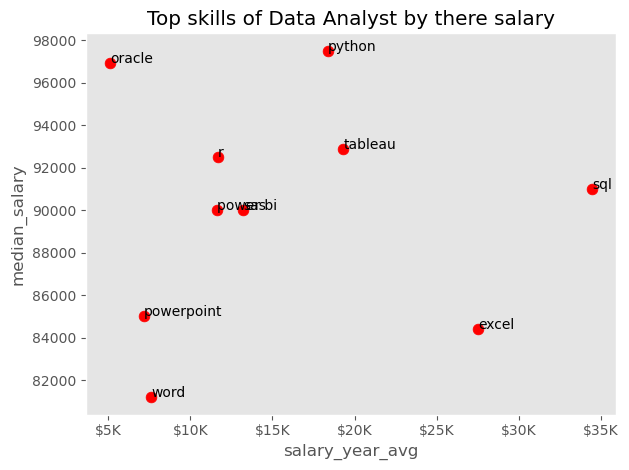

In [10]:
# Scatter plot for the top skill for data analyst
df_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']== 'United States')]
df_explode = df_DA.explode('job_skills')
skill_stats = df_explode.groupby('job_skills').agg(
      skill_count = ('job_skills', 'count'),
      median_salary = ('salary_year_avg', 'median')
).sort_values(by='skill_count', ascending=False).head(10)
# plotting 
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary', title='Top skills of Data Analyst by there salary', c='red', s=60, grid=False)
plt.xlabel('salary_year_avg')
for i, txt in enumerate(skill_stats.index):
      plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.tight_layout()
plt.show()

In [11]:
# On demand skills for the Data Analysis
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skill_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skill_count = skill_count.reset_index(name='skill_count')
df_skill_count = df_skill_count.sort_values(by='skill_count', ascending=False)

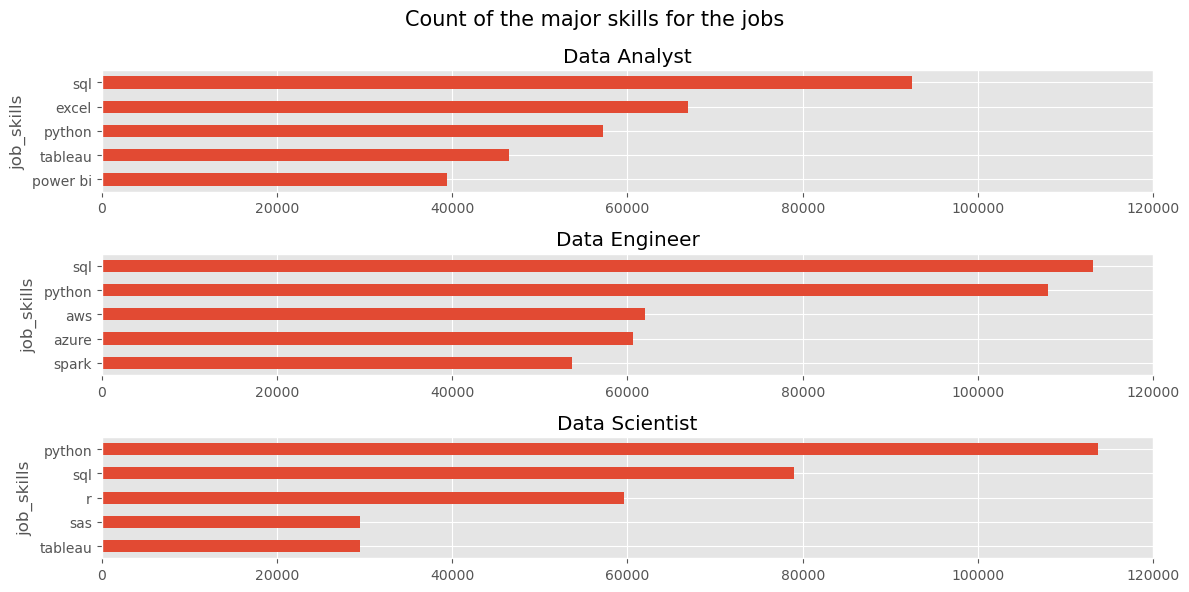

In [12]:
# Visulising the 3 jobs categories by there salary
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

fig, ax = plt.subplots(3,1, figsize=(12,6))
for i, job_title in enumerate(job_titles):
      df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5)
      df_plot.plot(kind='barh',x='job_skills', y='skill_count', ax=ax[i], title=job_title)
      ax[i].invert_yaxis()
      ax[i].set_xlim(0, 120000)
      ax[i].legend().set_visible(False)

fig.suptitle('Count of the major skills for the jobs', fontsize=15)
fig.tight_layout()
plt.show()

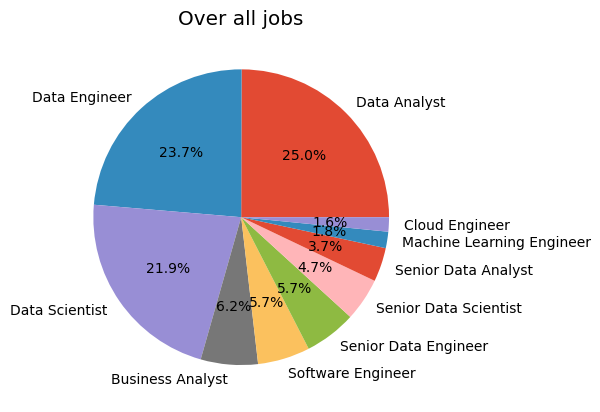

In [13]:
# Pie chart for the jobs
df['job_title_short'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Over all jobs')
plt.ylabel('')
plt.show()

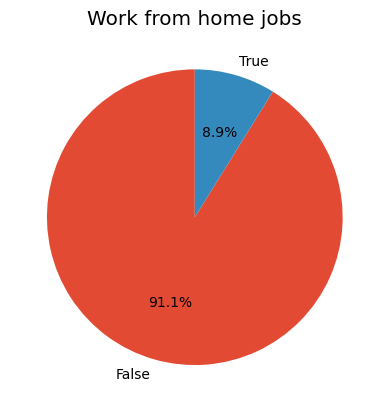

In [14]:
# Work from home
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from home jobs')
plt.ylabel('')
plt.show()

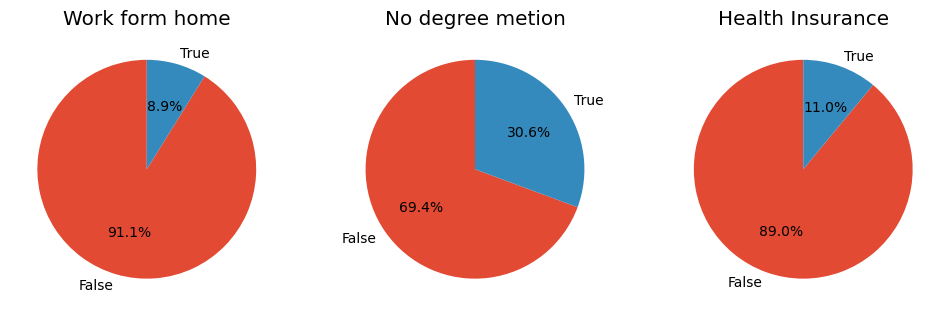

In [15]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
job_columns = {
      'job_work_from_home': 'Work form home',
      'job_no_degree_mention': 'No degree metion',
      'job_health_insurance': 'Health Insurance'
}

for i, (column, title) in enumerate(job_columns.items()):
      ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
      ax[i].set_title(title)

plt.show()

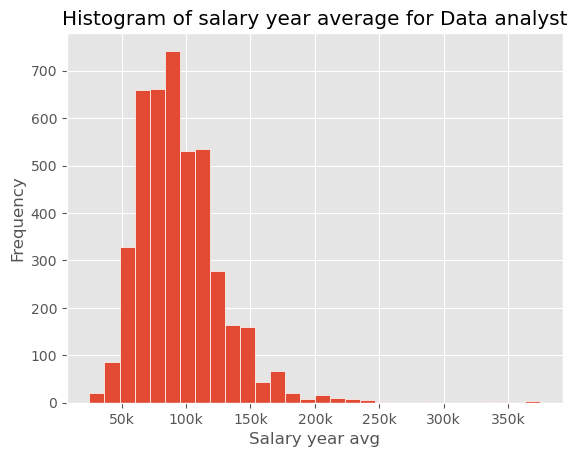

In [16]:
# Plotting histogram
df_DA['salary_year_avg'].plot(kind='hist', edgecolor='white', bins=30)
plt.title('Histogram of salary year average for Data analyst')
plt.xlabel('Salary year avg')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x/1000)}k"))
plt.show()

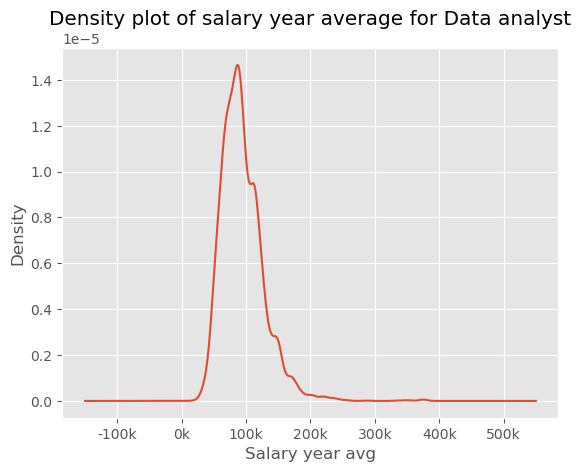

In [17]:
df_DA['salary_year_avg'].plot(kind='kde')
plt.title('Density plot of salary year average for Data analyst')
plt.xlabel('Salary year avg')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x/1000)}k"))
plt.show()

In [18]:
# Data cleaning and feature Engineering
df.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,785741,22003.000000,10662.000000
mean,2023-06-25 16:02:11.860248576,123286.274072,47.016598
min,2023-01-01 00:00:04,15000.000000,8.000000
25%,2023-03-20 10:05:48,90000.000000,27.500000
50%,2023-06-29 06:11:38,115000.000000,45.980000
75%,2023-09-27 01:01:16,150000.000000,61.159996
max,2023-12-31 23:59:58,960000.000000,391.000000
std,NaN,48312.449482,21.890738


In [19]:
df_feats = df.copy()

In [20]:
df_feats['year'] = df_feats['job_posted_date'].dt.year
df_feats['month'] = df_feats['job_posted_date'].dt.month
df_feats.columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills', 'year', 'month'],
      dtype='object')

In [21]:
df_feats.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,year,month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023,6
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,1
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023,10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023,7
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",2023,8


In [22]:
df_feats = pd.get_dummies(df_feats, columns=['job_work_from_home'], drop_first=True)
df_feats = pd.get_dummies(df_feats, columns=['salary_rate'], drop_first=True)
df_feats = pd.get_dummies(df_feats, columns=['job_schedule_type'], drop_first=True)

In [23]:
# Filling the null values with median of the salary_year_avg
median_salary_year = df_feats['salary_year_avg'].median()
median_salary_hour = df_feats['salary_hour_avg'].median()

In [24]:
df_feats['salary_year_avg'] = df_feats['salary_year_avg'].fillna(median_salary_year)
df_feats['salary_hour_avg'] = df_feats['salary_hour_avg'].fillna(median_salary_hour)

In [25]:
# Deleting duplicates
df_feats = df_feats.loc[~df_feats.duplicated(subset=['job_title', 'company_name'])].reset_index(drop=True).copy()

In [26]:
# Train Test and split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [27]:
df['year'] = df['job_posted_date'].dt.year
df['month'] = df['job_posted_date'].dt.month

In [28]:
df_test = df[[
      # 'job_title_short', 'job_title', 'job_location', 'job_via',
      #  'job_schedule_type', 
      'job_work_from_home', 
      # 'search_location',
      #  'job_posted_date', 
      # 'job_no_degree_mention', 
      'job_health_insurance',
      #  'job_country', 'salary_rate', 
      'salary_year_avg', 'salary_hour_avg',
      #  'company_name', 'job_skills', 'job_type_skills', 
      'year', 'month']].copy()

In [29]:
df_test['salary_year_avg'] = df_test['salary_year_avg'].fillna(median_salary_year)
df_test['salary_hour_avg'] = df_test['salary_hour_avg'].fillna(median_salary_hour)

In [30]:
df_test.shape

(785741, 6)

In [31]:
X = df_test.drop('salary_year_avg', axis=1)
y = df_test['salary_year_avg']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
predictions = lr.predict(X_test)

In [35]:
print('Linear Regression MAE', metrics.mean_absolute_error(y_test, predictions))
print('Linear Regression RMSE', np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

Linear Regression MAE 1258.734714038221
Linear Regression RMSE 35.47865152508225


In [36]:
# Using Randomforest model to see the classification and confusion matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

X = df_test.drop('salary_year_avg', axis=1)
y = df_test['salary_year_avg']
X = pd.get_dummies(X, columns=['job_work_from_home', 'job_health_insurance'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [38]:
X_train.shape

(628592, 5)

In [39]:
rn = RandomForestRegressor()
rn.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
rn_pred = rn.predict(X_test)

In [41]:
print('Random forest regression RME:',metrics.mean_absolute_error(y_test, rn_pred))

Random forest regression RME: 1250.4355603390811


In [42]:
print(metrics.mean_squared_error(y_test, rn_pred))

69253007.69105506


In [43]:
from sklearn.tree import DecisionTreeRegressor

X = df_test.drop('salary_year_avg', axis=1)
y = df_test['salary_year_avg']
X = pd.get_dummies(X, columns=['job_work_from_home', 'job_health_insurance'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(metrics.mean_absolute_error(y_test, dt_pred))
print(metrics.mean_squared_error(y_test, dt_pred))

1251.4987087863499
69251732.1802556


# Thank You!